In [1]:
# Importing libreries
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                      # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# importing data
dataset= pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\codervave internship\globalterrorismdb_0718dist1.csv",encoding='ISO-8859-1')

In [3]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
# check dataset shape
dataset.shape

(181691, 135)

In [5]:
# check for missing data
dataset.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [6]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Renaming column name
dataset = dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'})

In [8]:
# I'm just taking important data in whole dataset those I'm using further processing.
terror=dataset[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
# columns name
dataset.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
# ckecking for missing value
terror.isna().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
# summmary of terror data 
terror.describe()


,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:
# Country with the most attacks
country = terror['Country'].value_counts().sort_values(ascending = False).head(5)
country

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

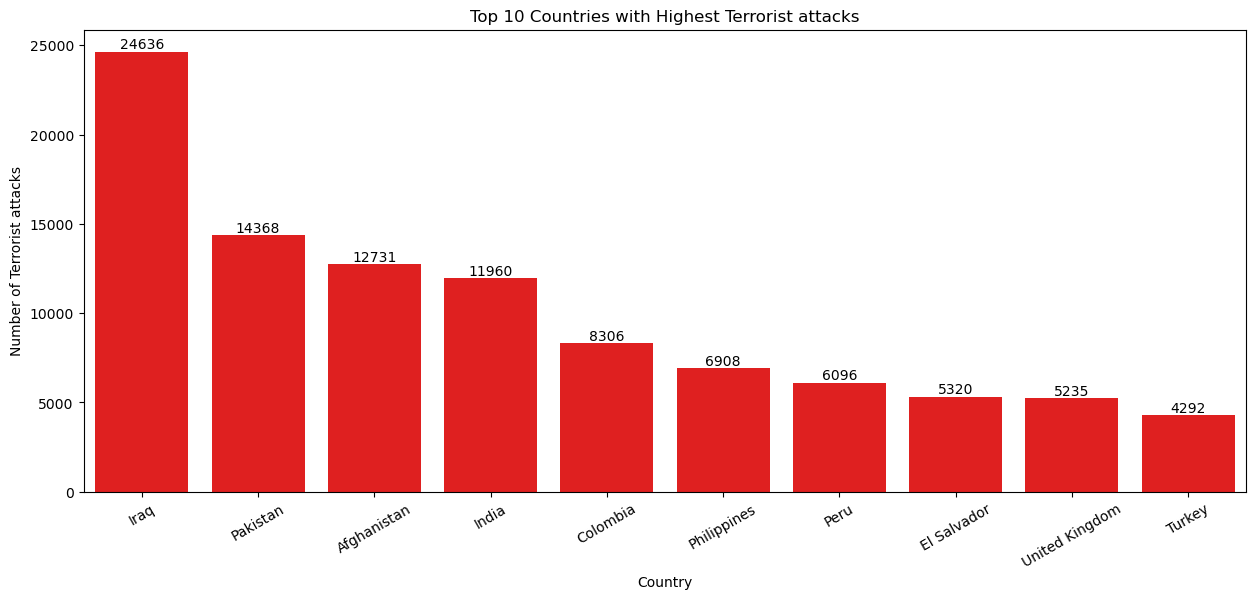

In [13]:
# I am going to visualize only top 10 Country where most of the terrorism attack hapeend

plt.figure(figsize=(15,6))
ax=sns.barplot(terror.Country.value_counts()[:10].index,terror.Country.value_counts()[:10].values,color='red')
for i in ax.containers:
    ax.bar_label(i)
# set the axis labels and title
plt.xlabel('Country')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 Countries with Highest Terrorist attacks')
plt.xticks(rotation=30)
plt.show()

In [14]:
#State with the most attacks
state = terror['state'].value_counts().head(10)
state

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: state, dtype: int64

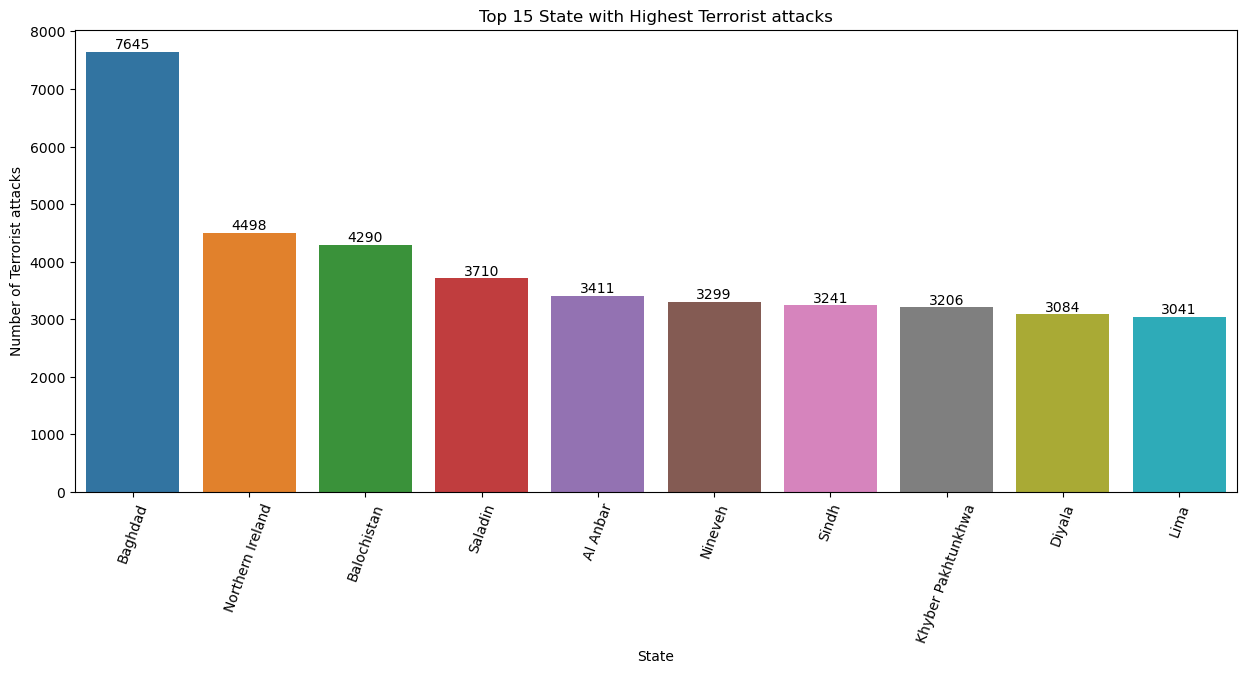

In [15]:
# I am going to visualize only top 10 State where most of the terrorism attack happend.
plt.figure(figsize=(15,6))
ax=sns.barplot(terror.state.value_counts().drop('Unknown')[:10].index,terror.state.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
# set the axis labels and title
plt.xlabel('State')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 15 State with Highest Terrorist attacks')
plt.xticks(rotation=70)
plt.show()

In [16]:
# City with the most attacks
city = terror['city'].value_counts().head(10)
city


Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

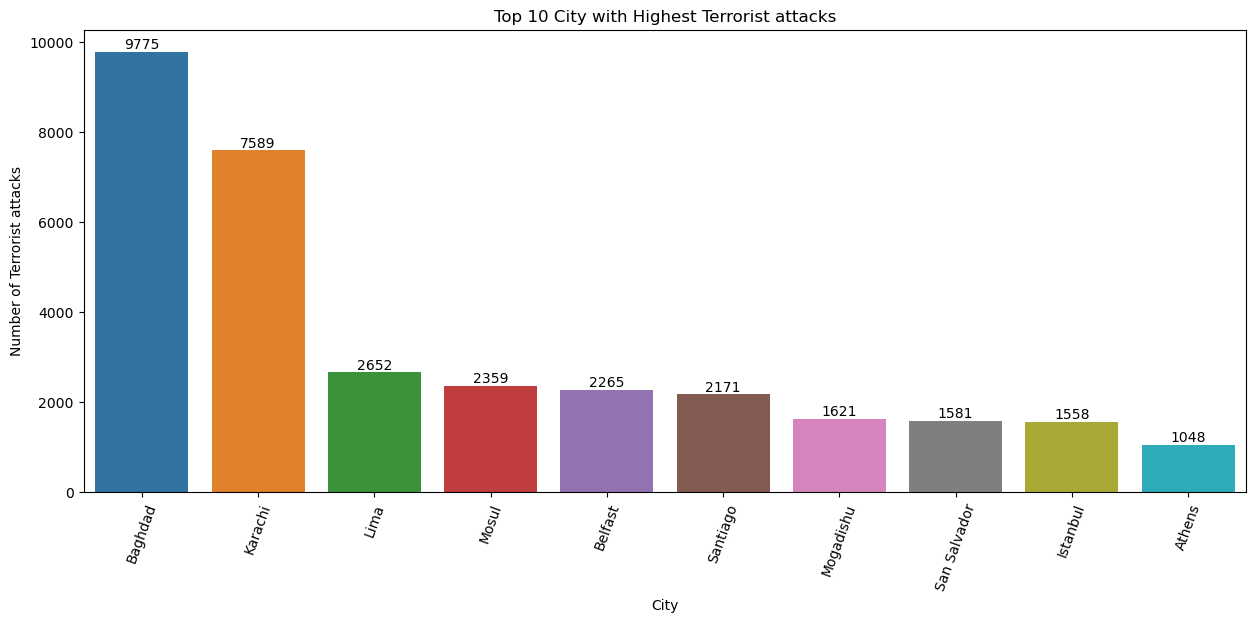

In [17]:
# Visualizing only top 10 City where most of the terrorism attack happend.
plt.figure(figsize=(15,6))
ax=sns.barplot(terror.city.value_counts().drop('Unknown')[:10].index,terror.city.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
# set the axis labels and title
plt.xlabel('City')
plt.ylabel('Number of Terrorist attacks')
plt.title('Top 10 City with Highest Terrorist attacks')
plt.xticks(rotation=70)
plt.show()

In [18]:
# Region with the most attack

region = terror['Region'].value_counts().head(10)
region

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

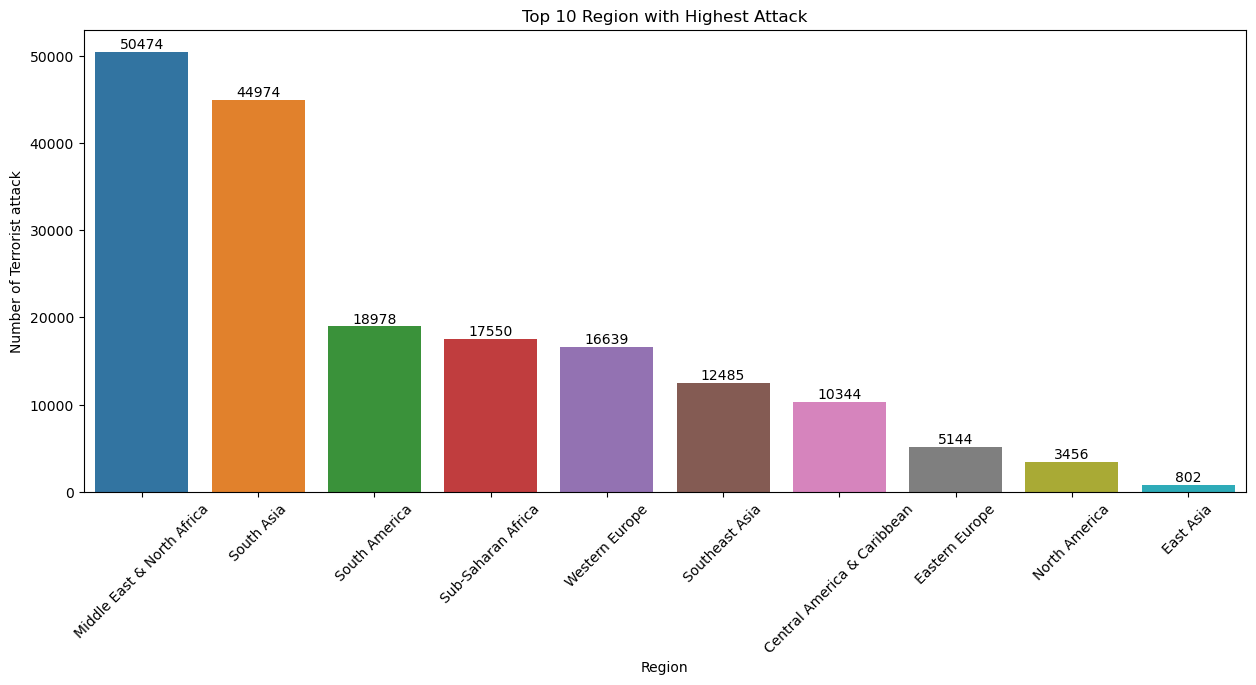

In [19]:
# Visualizing top 10 region wise attack
plt.figure(figsize = (15,6))
ax = sns.barplot(terror.Region.value_counts()[:10].index, terror.Region.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Region with Highest Attack')
plt.xlabel('Region')
plt.ylabel('Number of Terrorist attack')
plt.xticks(rotation = 45 )
plt.show()

In [20]:
# Year with the most attacks
year = terror['Year'].value_counts().head(10)
year

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: Year, dtype: int64

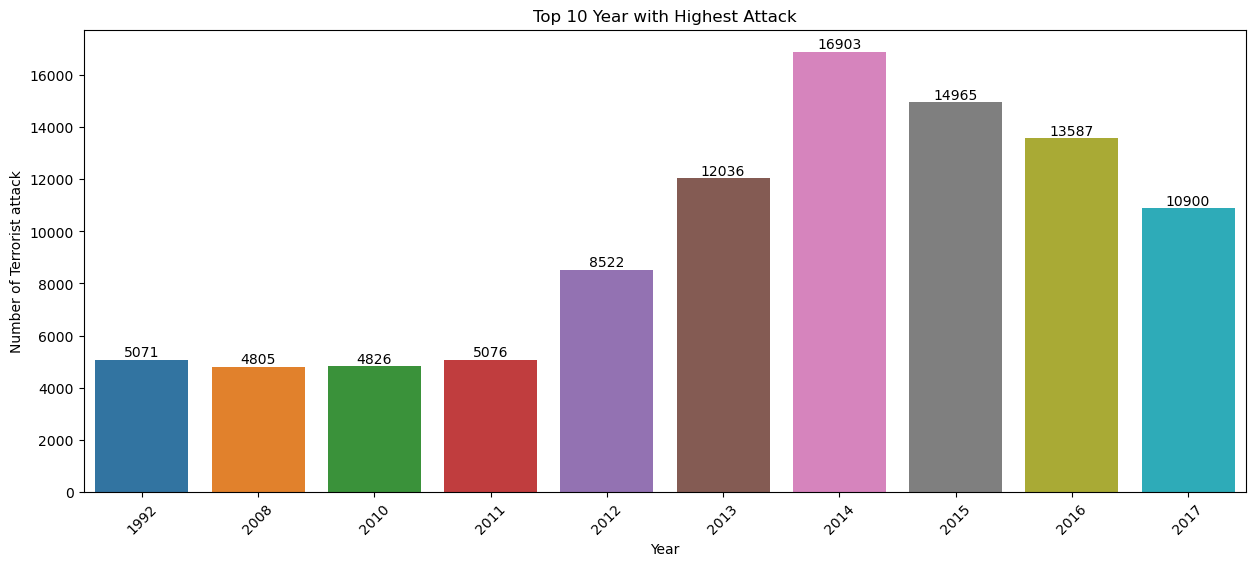

In [21]:
# Visualizing top 10 Year wise attack
plt.figure(figsize = (15,6))
ax = sns.barplot(terror.Year.value_counts()[:10].index, terror.Year.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Year with Highest Attack')
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attack')
plt.xticks(rotation = 45 )
plt.show()

In [22]:
# month of the most attack
month = terror['Month'].value_counts()
month

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64

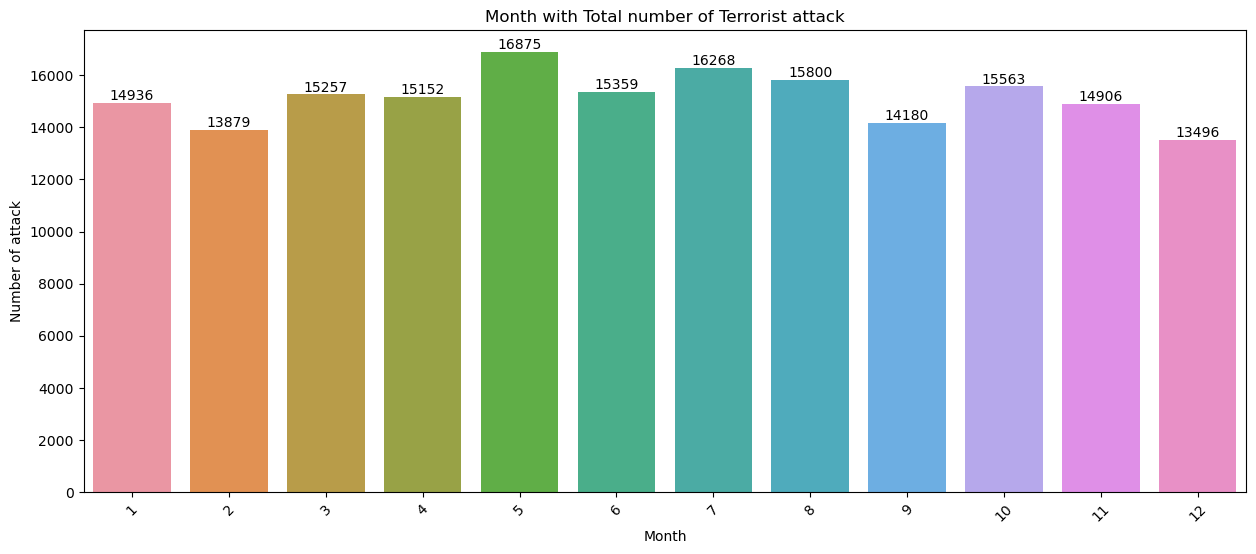

In [23]:
# Visualizing all Month where total number of attack happend 
plt.figure(figsize = (15,6))
ax = sns.barplot(terror.Month.value_counts()[:12].index, terror.Month.value_counts()[:12].values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Month with Total number of Terrorist attack')
plt.xlabel('Month')
plt.ylabel('Number of attack')
plt.xticks(rotation = 45 )
plt.show()

Top 5 Month where most of attack was happend:

5 (May) 16875.

7 (July) 16268.

8 (August) 15800.

10 (October) 15563.

6 (June) 15359.

In [24]:
# Group with the most attacks
terror_org = terror['Group'].value_counts().head(10)
terror_org

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

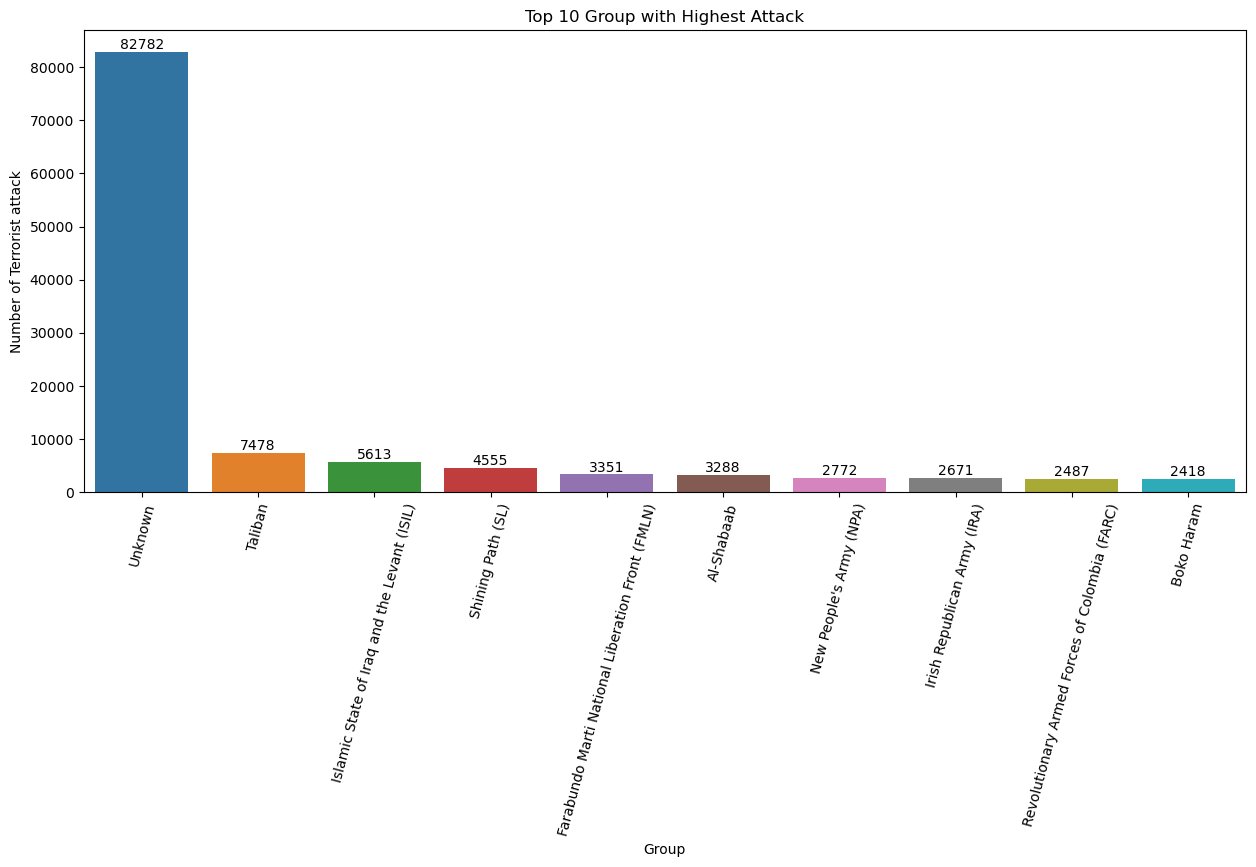

In [25]:
# Visualizing top 10 Group wise attack
plt.figure(figsize = (15,6))
ax = sns.barplot(terror.Group.value_counts()[:10].index, terror.Group.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 10 Group with Highest Attack')
plt.xlabel('Group')
plt.ylabel('Number of Terrorist attack')
plt.xticks(rotation = 75 )
plt.show()

In [26]:
# Most Attack Types
attack_type = terror['AttackType'].value_counts()
attack_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

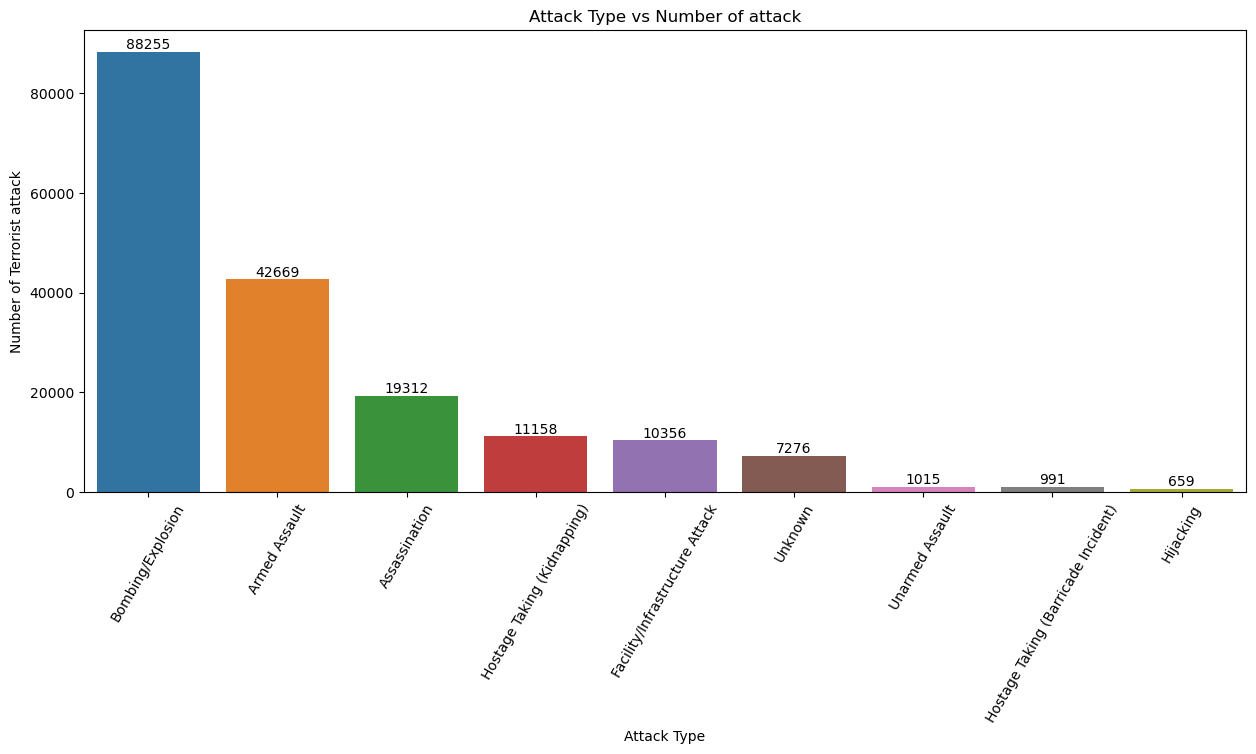

In [27]:
# Visualizing Attack Type
plt.figure(figsize = (15,6))
ax = sns.barplot(terror.AttackType.value_counts().index, terror.AttackType.value_counts().values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Attack Type vs Number of attack')
plt.xlabel('Attack Type')
plt.ylabel('Number of Terrorist attack')
plt.xticks(rotation = 60 )
plt.show()

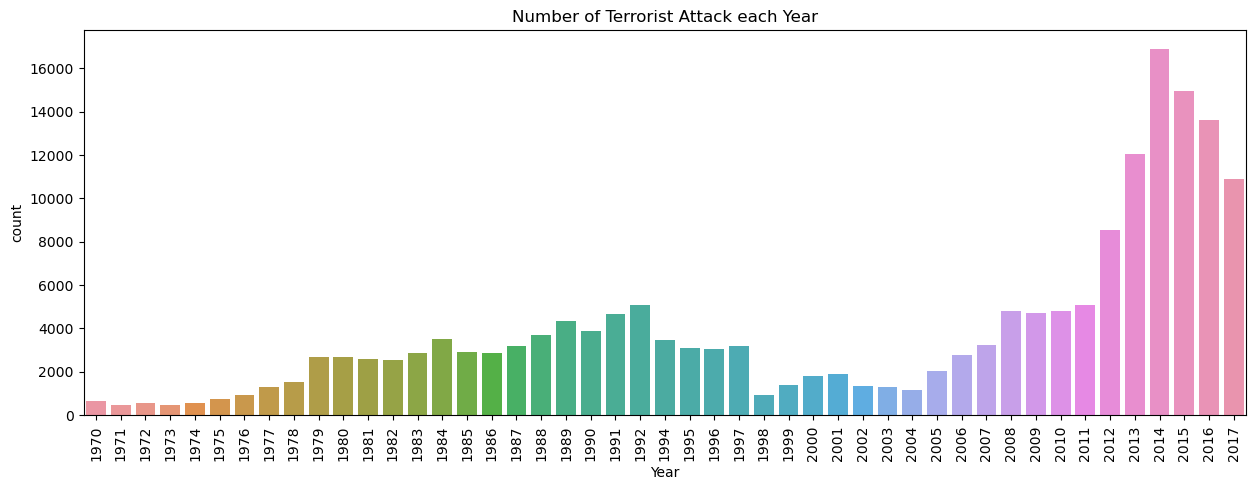

In [28]:
# Number of terrorist activities in each year
plt.figure(figsize = (15,5))
sns.countplot(terror['Year'])
plt.title('Number of Terrorist Attack each Year')
plt.xticks(rotation = 90)
plt.show()

Top 5 years with most Attack happened from 1970 to 2017

2014,
2015,
2016,
2013,
2017

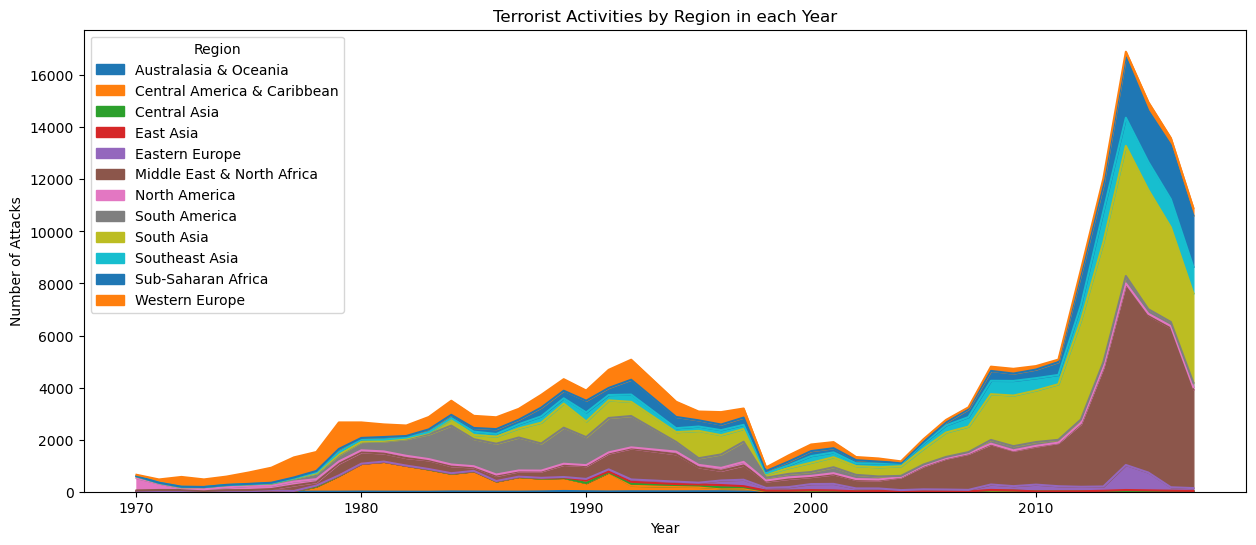

In [29]:
# Terrorist Activities by Region in each Year through Area Plot

pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [30]:
# Filling missing value with 0

terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)

In [31]:
# Creating new column 
terror['casualities'] = terror['Killed'] + terror['Wounded']
terror.head(2)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0


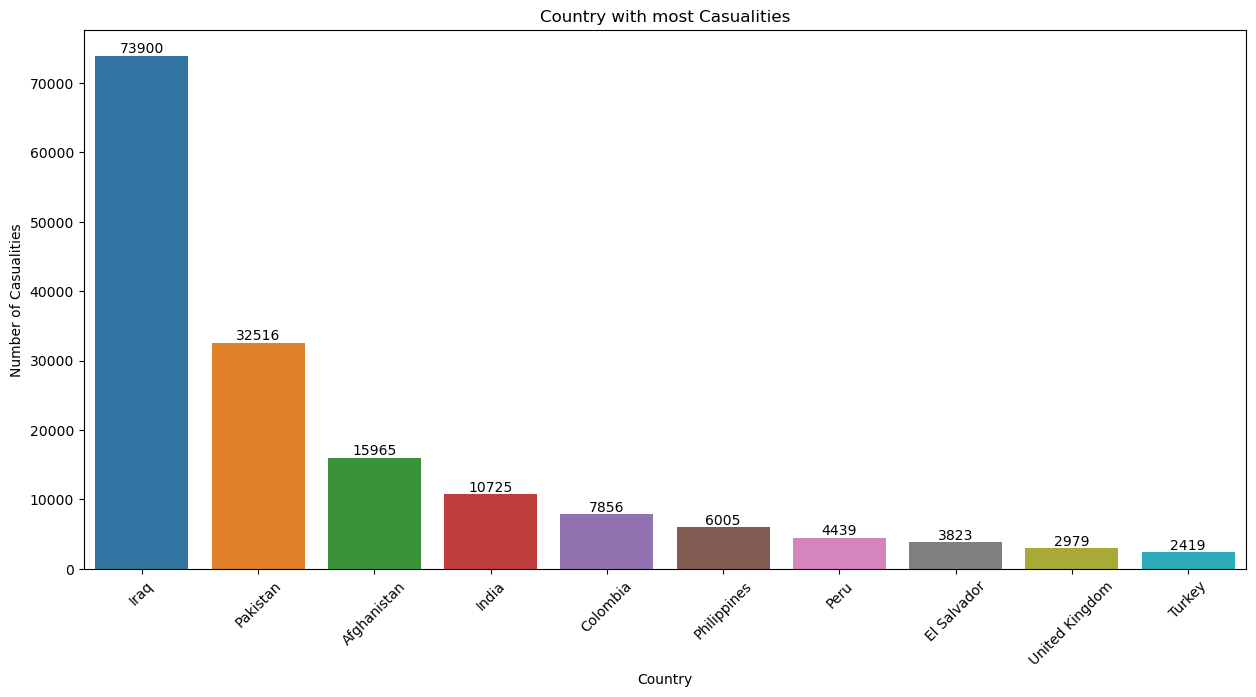

In [32]:
# Causalities Country wise:
plt.figure(figsize = (15,7))
ax = sns.barplot(terror.Country.value_counts()[:10].index, terror.casualities.value_counts()[:10].values)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Country with most Casualities')
plt.xlabel('Country')
plt.ylabel('Number of Casualities')
plt.xticks(rotation=45)
plt.show()

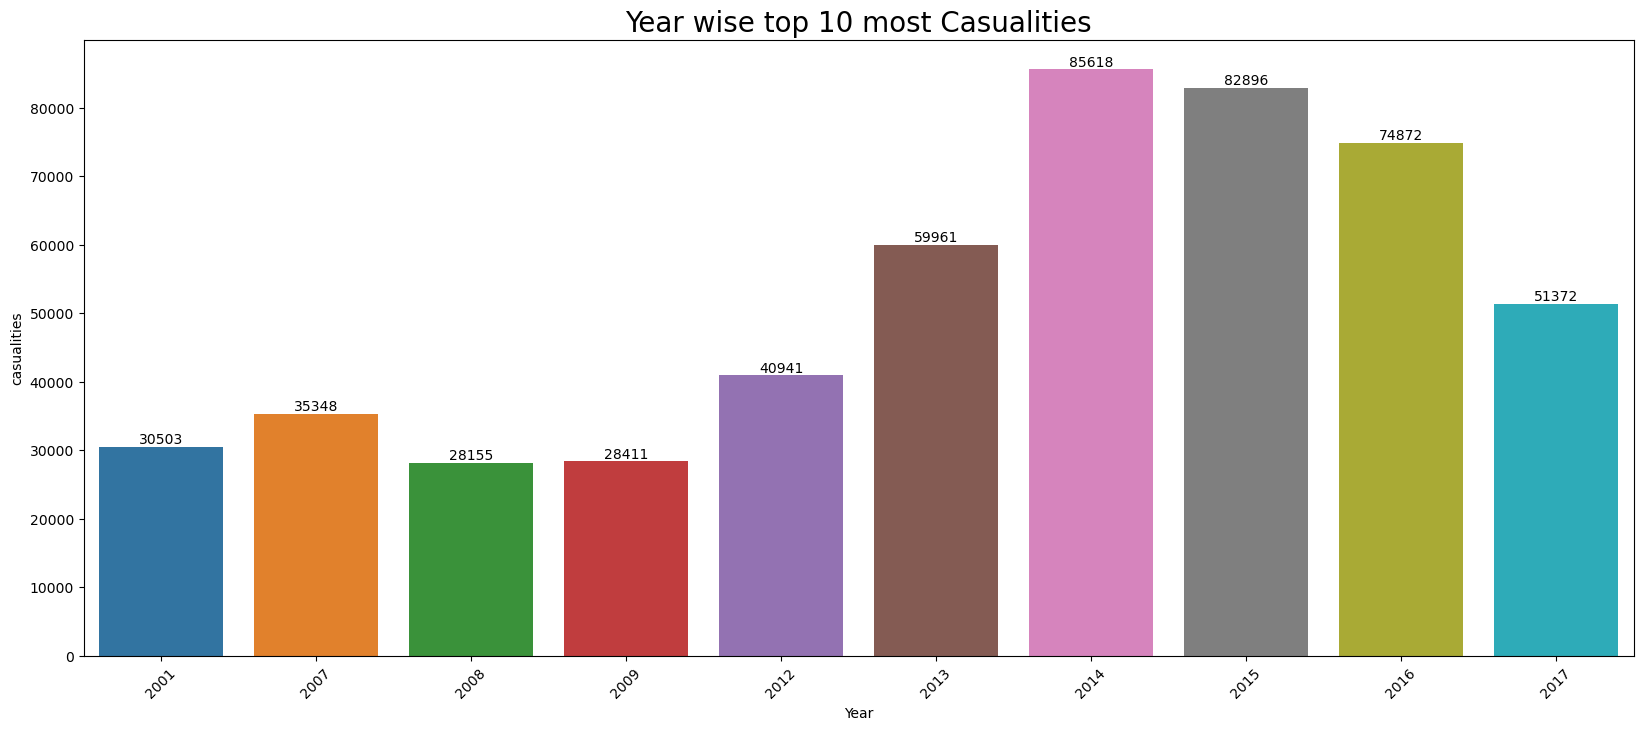

In [33]:
# year wise total Casualities
year_wise = terror.groupby(['Year'],as_index = False)['casualities'].sum().sort_values(by = 'casualities', ascending = False)[:10]
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Year', y = 'casualities', data = year_wise)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Year wise top 10 most Casualities', fontsize =20)
plt.xticks(rotation = 45)
plt.show()

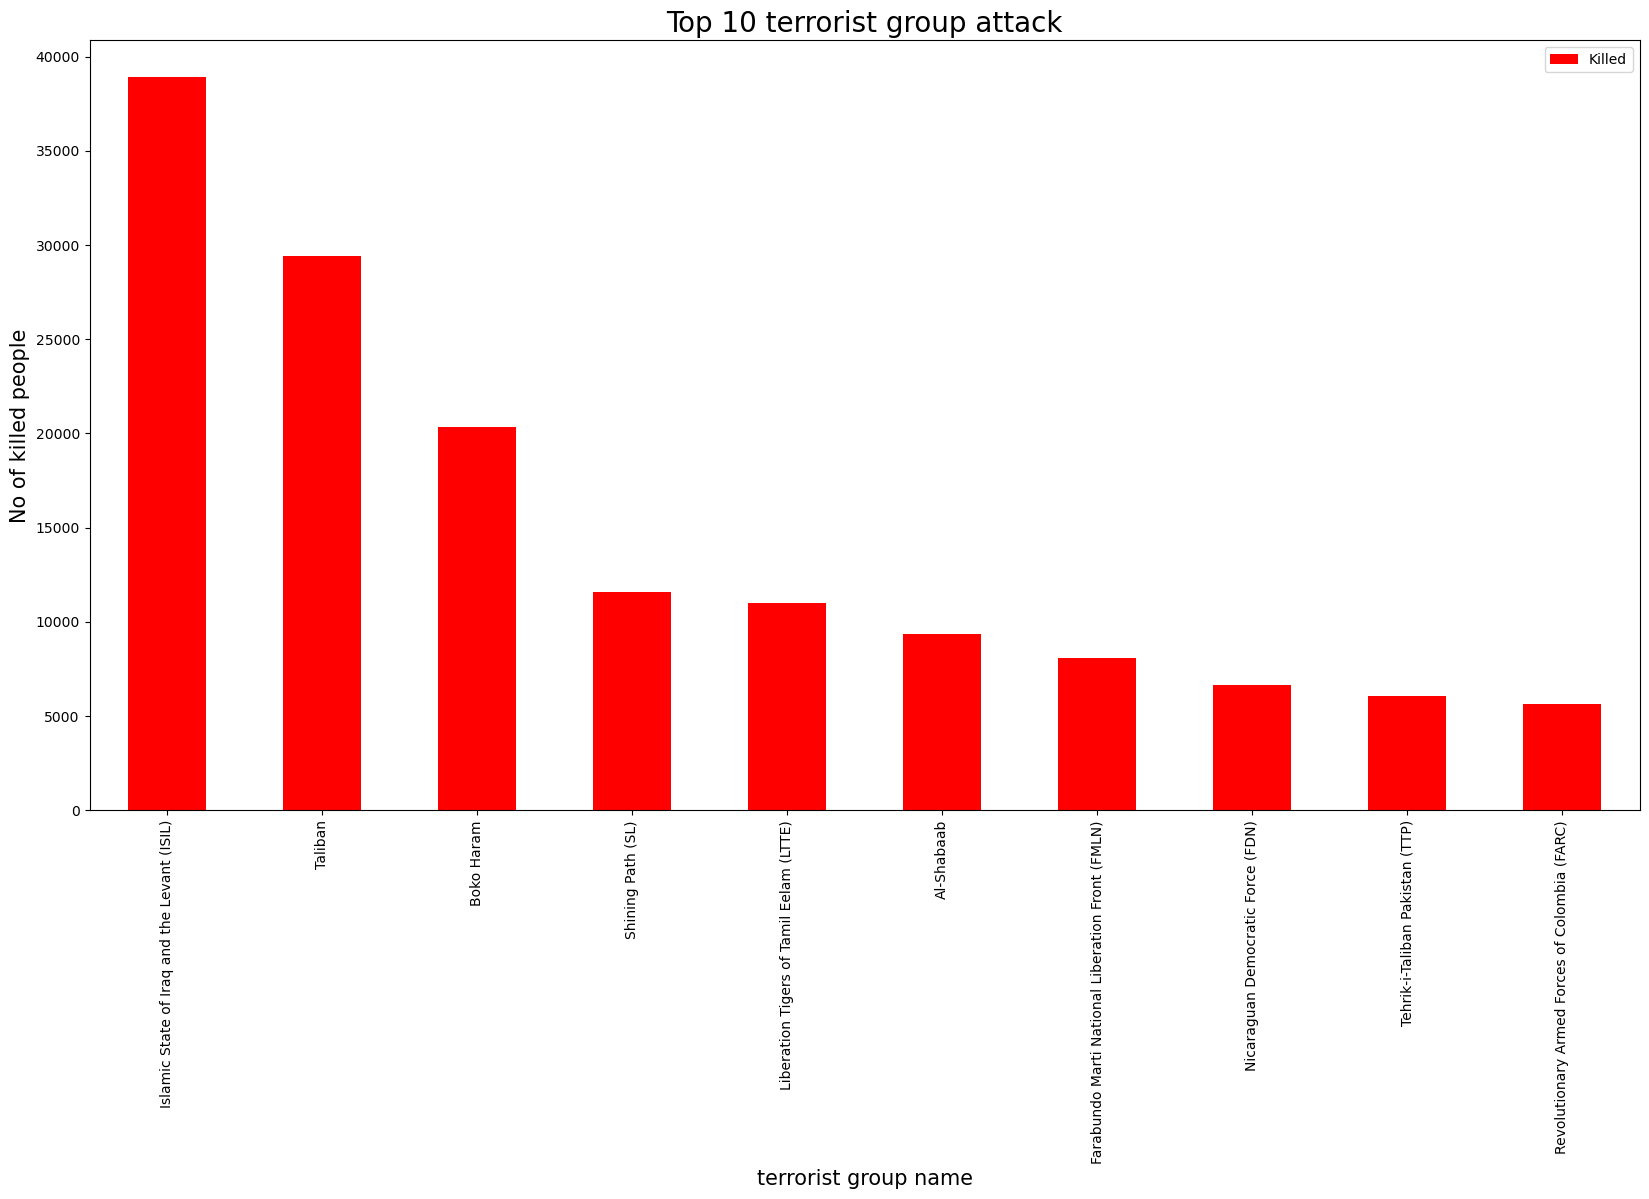

In [34]:
# Terrorist attack who make most of killed

df = terror[['Group','Killed']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values(by='Killed',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [46]:
typeKill = terror.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKill

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [36]:
# Total Killed
total_kills = terror.Killed.sum()
print(f"Total Casualities in Terror Attack: {total_kills}")

Total Casualities in Terror Attack: 411868


In [37]:
# Totol Country wise kills
country_kills = terror.pivot_table(columns = 'Country', values = 'Killed', aggfunc='sum')
country_kills

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,258,1,44,1244,76,14,79,3,0,9,42,79,11,203,0,28,134,4205,543,2347,365,1990,1119,228,1008,14698,1,17,248,8,45,6,27,4069,5,274,3,34,2,9,54,3869,12053,2,46,3,1765,0,8,11,534,1,0,6,13,278,84,19,325,9,8,5167,213,17,41,336,307,4,6,0,19341,1238,1,1673,78589,117,1703,420,268,42,66,133,39,1948,83,63,10,27,2,4061,46,177,2598,1,0,1,49,31,33,152,20,1432,5,0,43,0,780,13,1,292,2711,1280,220,1969,37,35,0,1,10598,1474,22682,3,3,79,23822,38,79,59,15,12771,9559,9,32,7,182,217,4,4308,3236,672,325,3,3,0,840,5,7,1,4,10273,2674,10,2634,81,0,96,1288,15530,0,2,3883,29,6,22,74,15229,60,307,73,2742,76,6,351,6888,3,3065,2261,123,3410,3771,6,68,0,0,227,1,0,1500,97,1,8776,119,324,70,154


# Terrorist Attacks of a Particular year and their Locations


In [40]:
pip install folium


     ------------------------------------ 102.3/102.3 kB 453.4 kB/s eta 0:00:00


In [41]:
import folium
from folium.plugins import MarkerCluster 

In [42]:
filterYear = terror['Year']==1970
filterData = terror[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

In [43]:
map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]],
                  popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

# Conclusion :

Month with most attackes - MAY

Most attacking group- TALIBAN

Most Attack Types: Bombing/Explosion

Country with the most attacks: Iraq

Country with the most casualities: Iraq

Year with the most attacks: 2014

### Thank you